# Vibrações Sob Condições Gerais de Forçamento

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

Usualmente, os sistemas mecânicos estão submetidos a diferentes tipos de forçamento e á necessário ter ferramentas para conhecer a resposta de cada um dos tipos de forçamento. 

## Forçamento Periódico

Vale observar que o forçamento harmônico é periódico, mas nem todo forçamento periódico é harmônico.

In [6]:
from IPython.display import Image

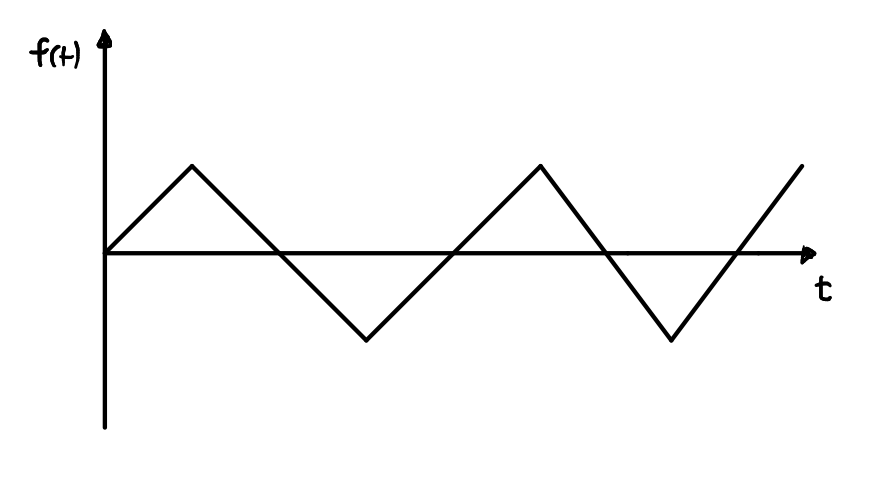

In [7]:
Image('figuras/fig4-1.png',width=500)

A solução do oscilador submetido a um forçamento periódico está baseada na ideia de que qualquer função periódica pode ser representada por uma série convergente de funções harmônicas, cujas frequências são múltiplos inteiros de um frequência fundamental $\omega_0$

### Série de Fourier

[Série de Fourier](https://bilimneguzellan.net/fuyye-serisi/?utm_source=pocket_saves)

$f(t) = \dfrac{1}{2}a_0 + \sum_{p=1}^{\infty}\left[a_p cos (p \omega_0 t)  + b_p sen ( p \omega_0 t) \right]$ 

em que $\omega_0 = \dfrac{2 \pi}{\tau}$

onde: 

$a_p = \dfrac{2}{\tau}\int^{\tau}_{0} f(t) cos(p \omega_0 t)dt$

$b_p = \dfrac{2}{\tau}\int^{\tau}_{0} f(t) sen(p \omega_0 t)dt$

A representação de determinada função depende de sua forma e, de fato, adota-se um número finito de termos, $N$, para representá-la. 

A determinação do número de termos necessários para a adequada representação de uma função está associada a uma análise de convergência.

Neste contexto, um forçamento periódico qualquer pode ser expresso da seguinte forma: 

$f(t) = \dfrac{1}{2} a_0 + \sum^{N}_{p=1}\left[a_p cos( p \omega_o t) + b_p sen (p \omega_0 t) \right]$

se $f(-t) = -f(t) \rightarrow$ função ímpar:

$f(t) = \sum_{p=1}^{\infty} bp sen (p \omega_0 t)$

se $f(-t) = f(t) \rightarrow$ função par:

$f(t) = \dfrac{a_0}{2} + \sum_{p=1}^{\infty} a_p cos(p \omega_0 t)$

**Considerando um oscilador linear:**

O princípio da superposição é valido!

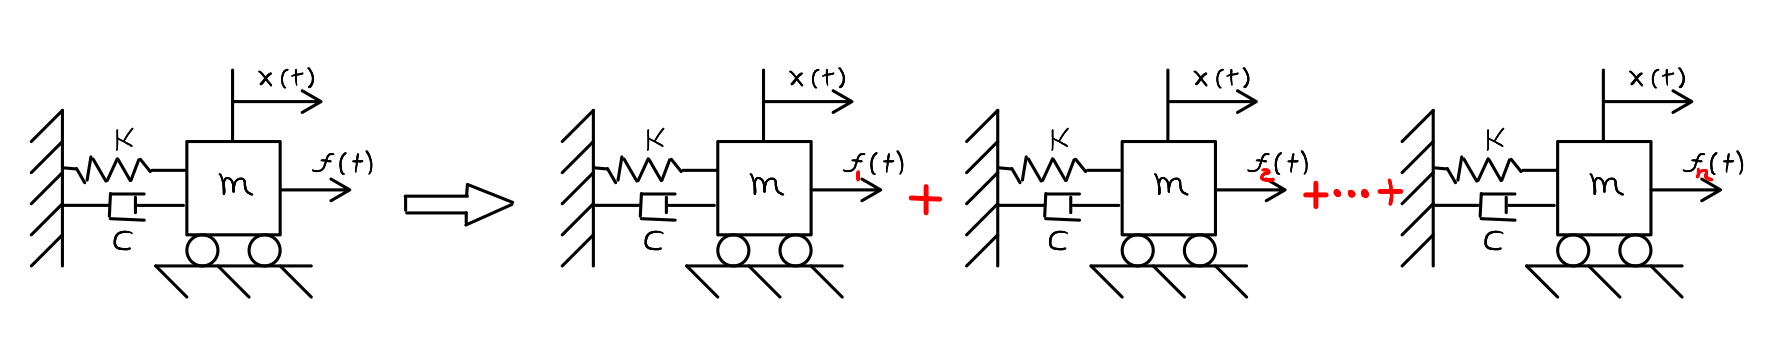

In [16]:
Image('figuras/fig4-2.png',width=800)

$x(t) = \dfrac{a_0}{2} + \sum^{\infty}_{p=1}|H_{p\omega_0}| \left[ a_p cos(p \omega_0 t - \phi_p) + b_p sen(p \omega_0 t - \phi_p) \right]$

$|H_{p\omega_0}| = \dfrac{1}{\left\{\left[1 - \left(\dfrac{p \omega_0}{\omega_n}\right)^2 \right]^2 + \left(2 \zeta p \dfrac{\omega_0}{\omega_n}\right)^2 \right\}}$

$\phi_p = arctg \left( \dfrac{2 \zeta p \omega_0 / \omega_n}{1 - \left(\dfrac{p \omega_0}{\omega_n}\right)^2}\right)$

### Exemplo 1:

Considere um oscilador com a seguinte equação de movimento:

$m \ddot{x} + c\dot{x} + kx = k f(t)$

em que a função f(t) é dada conforme mostra a figura a seguir:

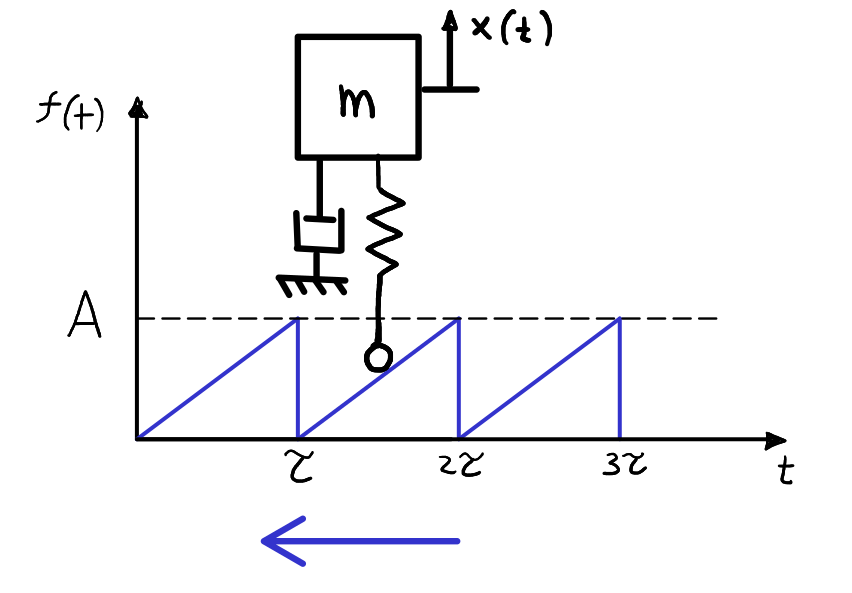

In [19]:
Image('figuras/fig4-3.png',width=600)

$f(t) = \dfrac{At}{\tau}$ para $0 < t  <\tau$

In [21]:
from sympy import *

In [22]:
A,t,tau,p,W0 = symbols('A t tau p omega_0',positive=True)

In [23]:
a0 = (2/tau)*integrate(A*t/tau,(t,0,tau))
a0

A

In [24]:
ap = (2/tau)*integrate(A*t/tau*cos(p*W0*t),(t,0,tau))
ap.simplify()

2*A*(omega_0*p*tau*sin(omega_0*p*tau) + cos(omega_0*p*tau) - 1)/(omega_0**2*p**2*tau**2)

Observando que $\omega_0 = \dfrac{2 \pi}{\tau}$ e $p=1,2,...,N$:

logo $sen(\omega_0 p \tau) = 0$ e $cos(\omega_0 p \tau) = 1$

In [26]:
dic = {sin(W0*p*tau):0,cos(W0*p*tau):1}

In [27]:
ap.subs(dic).simplify()

0

In [28]:
bp = (2/tau)*integrate(A*t/tau*sin(p*W0*t),(t,0,tau))
bp.subs(dic).simplify()

-2*A/(omega_0*p*tau)

In [29]:
wn,zeta = symbols('omega_n zeta',positive=True)

In [30]:
H_pW0 = 1/((1 - (p*W0/wn)**2)**2 + (2*zeta*p*W0/wn)**2)
H_pW0

1/(4*omega_0**2*p**2*zeta**2/omega_n**2 + (-omega_0**2*p**2/omega_n**2 + 1)**2)

In [31]:
phi = atan((2*zeta*p*W0/wn)/(1-(p*W0/wn)**2))
phi

atan(2*omega_0*p*zeta/(omega_n*(-omega_0**2*p**2/omega_n**2 + 1)))

In [32]:
dic2 = {zeta:0.2,A:1,wn:4,tau:1,W0:2*pi}

In [33]:
def f_t(N):
    f = A.subs(dic2)/2
    for i in range(1,N+1):
        f = f -((A/(p*pi))*sin(p*2*pi*t/tau)).subs(dic2).subs(p,i)
    plt1 = plot(f,(t,0,5),show = False)
    plt1.show()

In [34]:
from ipywidgets import interact

In [35]:
interact(f_t,N=(2,100,10))

interactive(children=(IntSlider(value=42, description='N', min=2, step=10), Output()), _dom_classes=('widget-i…

<function __main__.f_t(N)>

In [36]:
N = 50
x = a0.subs(dic2)/2
for i in range(1,N+1):
    x = x + (H_pW0*(ap*cos(p*W0*t-phi) + bp*sin(p*W0*t-phi))).subs(dic2).subs(p,i)

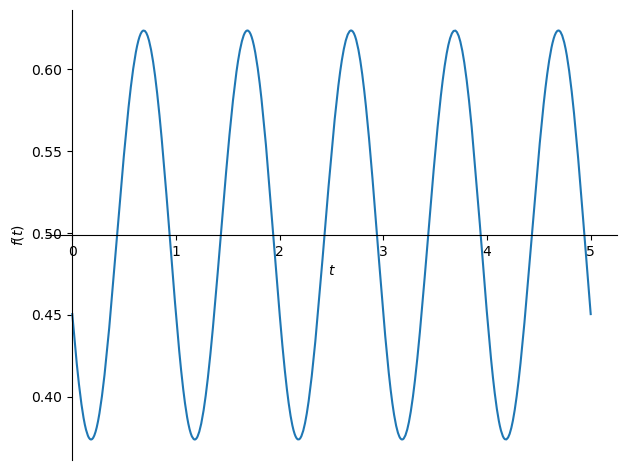

In [37]:
plot(x,(t,0,5))

## Forçamento Arbitrário

Uma maneira de representar esse tipo de função é pela superposição de impulsos de várias amplitudes aplicadas em diferentes instantes de tempo. 

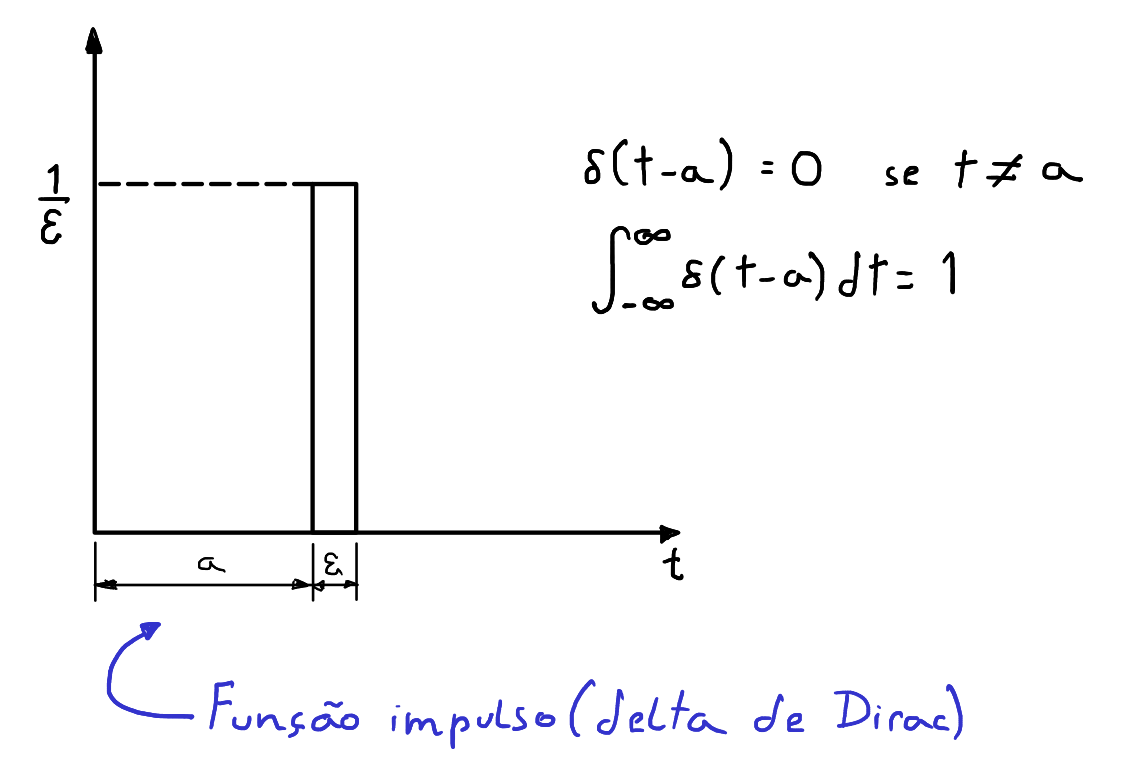

In [40]:
Image('figuras/fig4-4.png',width=600)

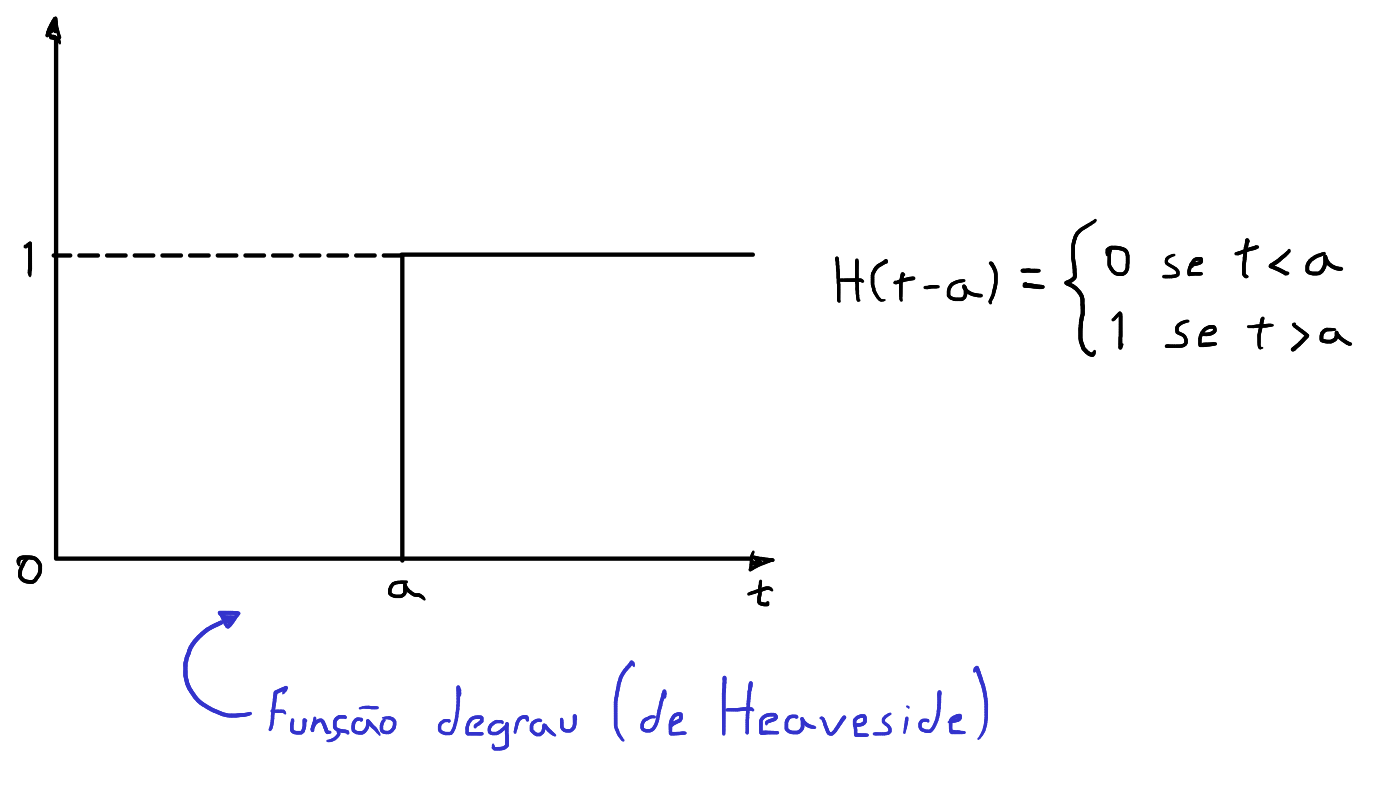

In [41]:
Image('figuras/fig4-5.png',width=600)

A partir dessa definição, observa-se a relação existente entre as funções degrau e impulso 

$H(t-a) = \int_{-\infty}^{t} \delta (t^* - a)d t^* \rightarrow \delta(t-a) = \dfrac{d}{dt}H(t-a)$

In [43]:
t = symbols('t')

In [44]:
DiracDelta(t)

DiracDelta(t)

In [45]:
Heaviside(t)

Heaviside(t)

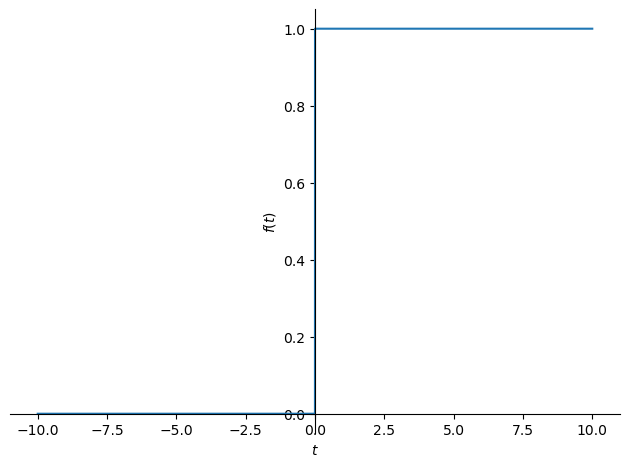

In [46]:
plt2 = plot(Heaviside(t),show = False)
plt2.show()

### Representação do Forçamento Arbitrário

$\rightarrow$ Um forçamento arbitrário pode ser representado a partir de uma combinação de vários impulsos.

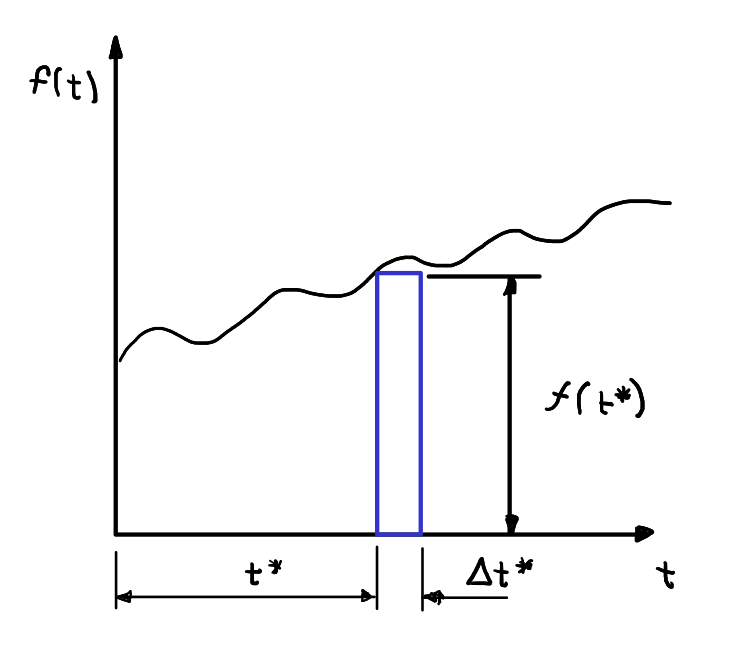

In [49]:
Image('figuras/fig4-6.png',width=500)

$\Delta f = f(t^*)\Delta t ^* \delta(t-t^*)$

podemos aproximar $f(t)$ como:

$f(t) \approx \sum_{t}\Delta f \approx \sum_t f (t^*)\Delta t^* \delta (t - t^*)$

fazendo $\Delta t^* \rightarrow 0$

$f(t) = \int_0^t f(t^*) \delta (t-t^*)dt^*$

$\rightarrow$ A solução desse sistema pode ser obtida a partir da soulução da resposta a um impulso.Para isso, utiliza-se a ideia da superposição de efeitos e, como o forçamento é a soma de vários impulsos, a resposta é a soma de várias respostas a impulsos. 

### Respostas a um impulso

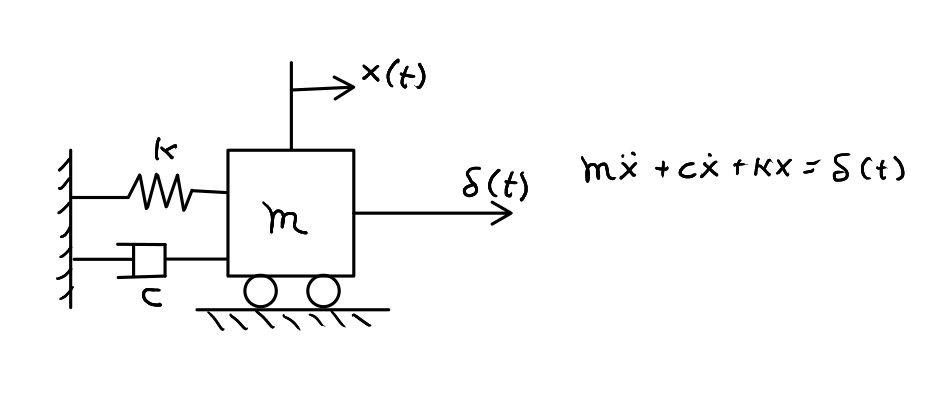

In [53]:
Image('figuras/fig4-7.png',width=600)

O impulso pode ser entendido como uma condição inicial, uma vez que sua aplicação ocorre em um instante de tempo determinado e, depois, o sistema vibra livremente. Assim, avalia-se o que ocorre em $\Delta t = \varepsilon$, em que $\varepsilon \rightarrow 0$.

$\lim_{\varepsilon \to 0} \int_{0}^{\varepsilon}(m\ddot{x} + c \dot{x} + kx)dt = \lim_{\varepsilon \to 0} \int_{0}^{\varepsilon} \delta(t) dt$ 

admitindo-se que $x(0) = \dot{x}(0) = 0$:

$\lim_{\varepsilon \to 0} \int_0^{\varepsilon} \delta(t)dt = 1$

$\lim_{\varepsilon \to 0} \int_0^{\varepsilon} m \ddot{x} dt = \lim_{\varepsilon \to 0} m \dot{x}|_0^\varepsilon = \lim_{\varepsilon \to 0}m [\dot{x}(\varepsilon) -\dot{x}(0)] = m\dot{x}(0^+)$

$\lim_{\varepsilon \to 0} \int_0^{\varepsilon} c \dot{x} dt = \lim_{\varepsilon \to 0}c x|_0^\varepsilon = \lim_{\varepsilon \to 0}c [x(\varepsilon) -x(0)] = 0$

$\lim_{\varepsilon \to 0} \int_0^{\varepsilon} k x dt = 0$

$m\dot{x}(0^+) = 1$


Com isso, conclui-se que a resposta a um impulso é equivalente a uma condição inicial do tipo:

$\dot{x}(0^+) = \dfrac{1}{m}$

Utilizando esse resultado como condição inicial na solução de vibrações livres, tem-se que a resposta do sistema é dada por:

$x(t) = x_{\delta}(t) = \dfrac{1}{m \omega_a} e^{- \zeta \omega_a t} sen(\omega_a t)$

onde $\omega_a = \omega_n \sqrt{1 - \zeta^2}$

### Resposta a forçamento arbitrário

Uma vez que o forçamento pode ser representado a partir de vários impulsos, e também tendo em vista que se conhece a resposta a um único impulso, é possível utilizar a superposição de efeitos e combinar as diversas soluções para obter a solução geral.

$\Delta x = f(t^*)\Delta t^* x_{\delta}(t-t^*)$

Onde $f(t^*)\Delta t^*$ é a amplitude do forçamento arbitrário no instante de tempo em questão e $x_{\delta}(t-t^*)$ é a solução de um único impulso.

$x \approx \sum f(t^*) x_{\delta} (t - t^*) \Delta t^*$

quando $\Delta t^* \to 0$:

$x(t) = \int_0^t f(t^*) x_{\delta}(t - t^*)dt^*$

Esta integral é chamada de **integral de convolução**, ela expressa a resposta de um oscilador submetido a um forçamento $f(t)$, arbitrário, como a superposição de respostas a diversos impulsos.


$\vartheta = t - t^*$

$dt^* = - d\vartheta$

$\left\{ \begin{array}{} t^* = 0 \rightarrow \vartheta = t \\ t^* = t \rightarrow \vartheta = 0 \end{array} \right.$

Assim:

$x(t) = - \int_t^0 f(t - \vartheta) x_{\delta} d \vartheta$

Deste modo, ao invés de se condiderar a resposta a um impulso defasado pelo tempo $t = t^*$, considera-se o forçamento defasado:

$x(t) = \int_0^t f(t^*)x_{\delta}(t - t^*)dt^* = \int_0^t f(t-t^*)x_{\delta}(t^*)dt^*$

$\rightarrow$ A integral de convolução é simétrica em relação ao forçamento ou à resposta ao impulso. 

### Exemplo 2:

Obter a resposta do sistema mostrado na figura a seguir.

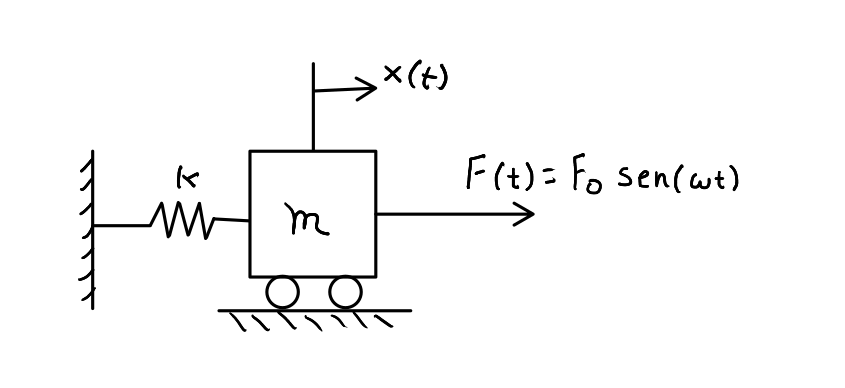

In [62]:
Image('figuras/fig4-8.png',width=600)

In [63]:
f0,w,t,tstar,zeta,wn,m = symbols('F_0 omega t t^* zeta omega_n m', positive = True)

In [64]:
x = Integral(f0*sin(w*tstar)*(1/(m*wn))*sin(wn*(t-tstar)),(tstar,0,t))
x

Integral(F_0*sin(omega*t^*)*sin(omega_n*(t - t^*))/(m*omega_n), (t^*, 0, t))

In [65]:
x.doit()

F_0*(-Piecewise((-omega*sin(omega_n*t)*cos(omega*t)/(omega**2 - omega_n**2) + omega_n*sin(omega*t)*cos(omega_n*t)/(omega**2 - omega_n**2), Ne(omega, omega_n)), (t*sin(omega_n*t)**2/2 + t*cos(omega_n*t)**2/2 - sin(omega_n*t)*cos(omega_n*t)/(2*omega_n), True))*cos(omega_n*t) + Piecewise((-omega*cos(omega*t)*cos(omega_n*t)/(omega**2 - omega_n**2) - omega_n*sin(omega*t)*sin(omega_n*t)/(omega**2 - omega_n**2), Ne(omega, omega_n)), (-cos(omega_n*t)**2/(2*omega_n), True))*sin(omega_n*t))/(m*omega_n) - F_0*Piecewise((-omega/(omega**2 - omega_n**2), Ne(omega, omega_n)), (-1/(2*omega_n), True))*sin(omega_n*t)/(m*omega_n)

## Transformada de Laplace

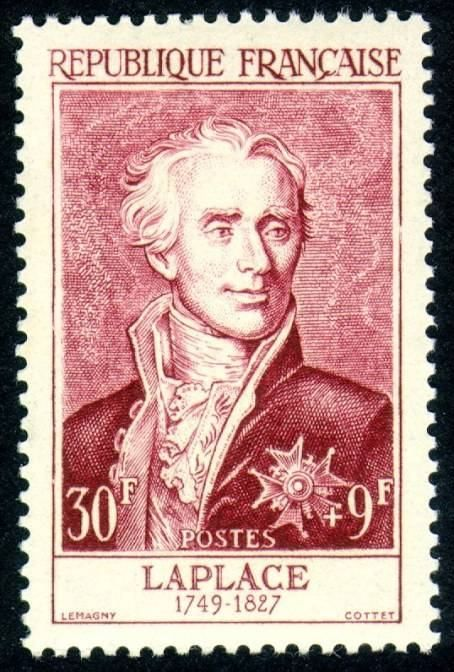

In [67]:
Image('figuras/laplace.jpg',width=300)

→ Em essência, a ideia básica de uma transformada é levar o problema desde o espaço físico para um novo espaço abstrato, no qual a solução é obtida de forma conveniente. 

→ Uma vez resolvendo o problema nesse espaço, utiliza-se uma transformada inversa para retornar para o espaço físico.


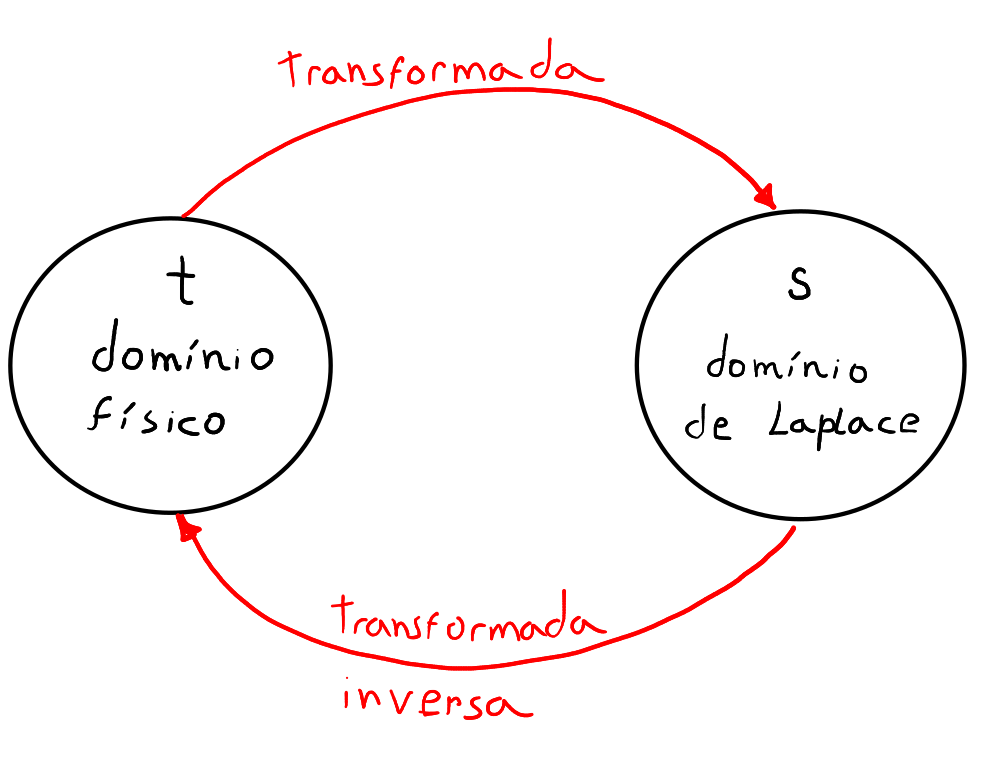

In [69]:
Image('figuras/fig4-9.png',width=600)

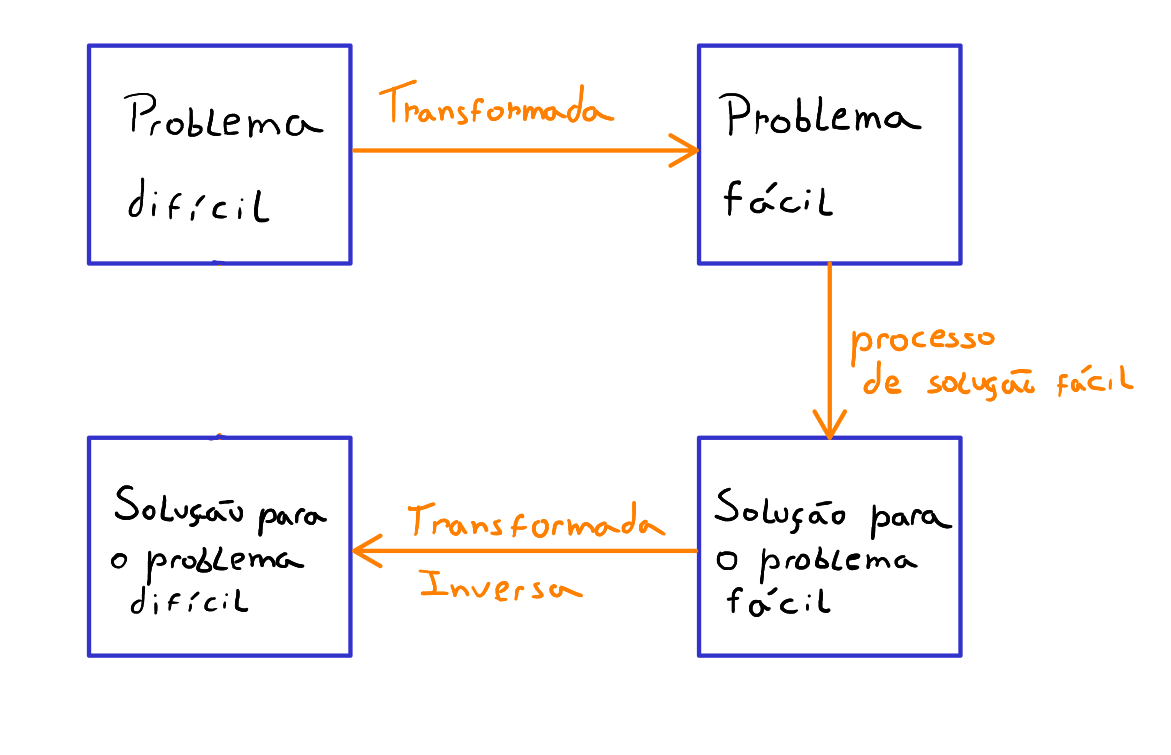

In [70]:
Image('figuras/fig4-10.png',width=600)

- Transformada

$X(s) = \mathscr{L}\{x(t)\} = \int_{0}^{\infty} e^{-st}x(t)dt$


- Transformada inversa

$x(t) = \mathscr{L}\{X(s)\} = \dfrac{1}{2\pi i}\int_{a-i\infty}^{a+i\infty} e^{st}X(s)ds$
em que $s = a + ib$

Tabela transformadas de Laplace →  https://www.ime.unicamp.br/~msantos/tab-laplace

Propriedades da transformada de Laplace:

- $\mathscr{L}\{\alpha_1 x_1 + \alpha_2 x_2\} = \alpha_1 X_1 + \alpha_2 X_2$
- $\mathscr{L}\{\alpha x\} = \alpha X$
- $\mathscr{L}\{\dot{x}\} = sX - x(0)$
- $\mathscr{L}\{\ddot{x} \} = s^2 X - sx(0) - \dot{x}(0)$

A **função de transferência** de um sistema representado por uma equação diferencial linear invariante no tempo é definida como a relação entre a transformada de Laplace da saída (função de resposta) e a transformada de Laplace da entrada (função de excitação), admitindo-se todas as condições iniciais nulas. 

Aplicando à equação de movimento:

$\mathscr{L}\{m\ddot{x} + c \dot{x} + k x \} = m \mathscr{L} \{\ddot{x}\} + c \mathscr{L} \{\dot{x}\} + k \mathscr{L}\{x\}$ 

$m \left[ s^2 X(s) - sx(0) - \dot{x}(0) \right] + c \left[s X(s) - x(0) \right] + k X(s) = F(s)$ 

ou:

$\left[ s^2 + 2 \zeta \omega_n s + \omega_n^2 \right] X(s) = \dfrac{F(s)}{m} + \dot{x}(0) + (s + 2\zeta \omega_n)x(0)$

Considerando condições iniciais nulas $x(0) = \dot{x}(0) = 0$:

$X(s) = \dfrac{F(s)}{Z(s)}$ em que $Z(s)$ é definida como a impedância:

$Z(s) = m \left[s^2 + 2 \zeta \omega_n s + \omega_n^2\right]$

$\to$ Outra forma de expressar a resposta do sistema no domínio de Laplace é pela **função de transferência** definida como:

$X(s) = G(s) F(s)$

$G(s) = \dfrac{1}{m \left[ s^2 + 2 \zeta \omega_n s + \omega_n^2 \right]}$

→ Uma vez determinada, a função de transferência fornece uma descrição das características dinâmicas do sistema, independentemente de sua descrição física.

→ A aplicabilidade do conceito de função de transferência é limitada a sistemas de equações diferenciais lineares invariantes no tempo. 

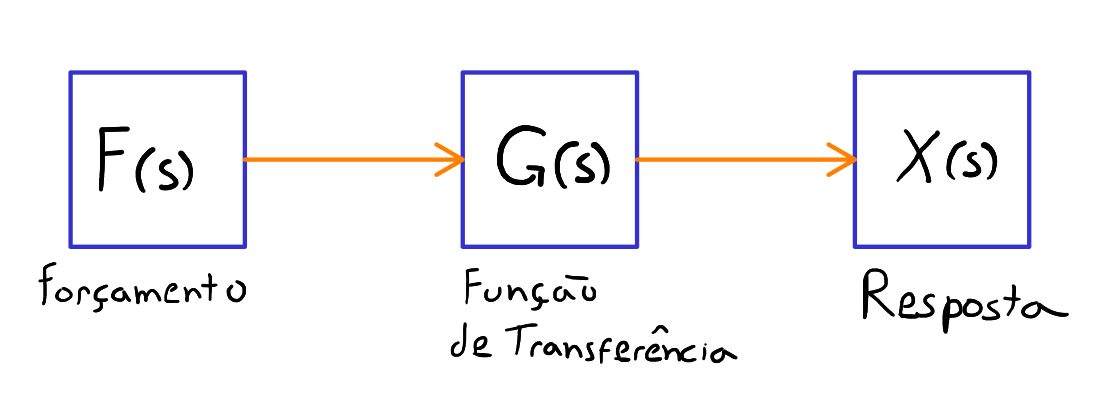

In [78]:
Image('figuras/fig4-11.png',width=600)

### Transformada Inversa de Laplace

A resposta do sistema no domínio de Laplace é expressa por uma razão de polinômios:

$G(s) = \dfrac{N(s)}{D(s)} = \dfrac{b_0 s^m + b_1 s^{m-1} + ... + b_{m-1} s + b_m}{a_0 s^n + a_1s^{n-1} + ... + a_{n-1}s + a_n}$

Como o objetivo final é efetuar a transformação inversa, é util utilizar a expansão em frações parciais.

Para isso, é conveniente expressar o denominador D(s) a partir das suas raízes, conhecidas como polos do sistema. Assim: 

$X(s) = \dfrac{N(s)}{(s+p_1)(s+p_2)...(s+p_3)}$

$X(s) = \dfrac{C_1}{s+p_1} + \dfrac{C_2}{s+p_2} + ... + \dfrac{C_j}{s+p_n}$

$x(t) = C_1 e^{-p_1 t} + C_2 e ^{-p_2 t} + ... + C_n  e^{p_n t}$ 

**Exemplo 1:**

Considere que a resposta de um sistema mecânico no domínio do tempo de Laplace é representado pelo polinômio a seguir. Reescreva o polinômio utilizando expansão em frações parciais.

$X = \dfrac{s+2}{s^3 + 5s^2 + 4s}$


Expansâo em frações parciais em Python:

In [84]:
from sympy import *

In [85]:
t,s = symbols('t s')

In [86]:
f = (s+2)/(s**3 + 5*s**2 + 4*s)
f

(s + 2)/(s**3 + 5*s**2 + 4*s)

In [87]:
f.apart()

-1/(6*(s + 4)) - 1/(3*(s + 1)) + 1/(2*s)

### Resposta a uma Função Impulso Unitário

A transformada de Laplace da função Impulso Unitário (delta de Dirac) é igual a 1.

**Exemplo 2:**

Avalie a resposta de um oscilador linear (sistema massa-mola-amortecedor) submetido a um impulso utilizando a transformada de Laplace.

Dados:
* $m = 2kg$
* $\zeta = 0.15$
* $\omega_n = 30$

In [90]:
s,t = symbols('s t')

In [91]:
m_n = 2
zeta_n = 0.15
omega_n = 30

In [92]:
G = (1/m_n)/(s**2 + 2*zeta_n*omega_n*s + omega_n**2)
G

0.5/(s**2 + 9.0*s + 900)

In [93]:
G.apart(s)

0.000555555555555556/(0.00111111111111111*s**2 + 0.01*s + 1.0)

In [94]:
x = inverse_laplace_transform(G,s,t)
x

1.0*(0.0168573912474725 + 2.16840434497101e-19*I)*exp(-4.5*t)*sin(29.6605798999278*t)*Heaviside(t)

In [95]:
DiracDelta(t)

DiracDelta(t)

In [96]:
x.subs(Heaviside(t),1)

1.0*(0.0168573912474725 + 2.16840434497101e-19*I)*exp(-4.5*t)*sin(29.6605798999278*t)

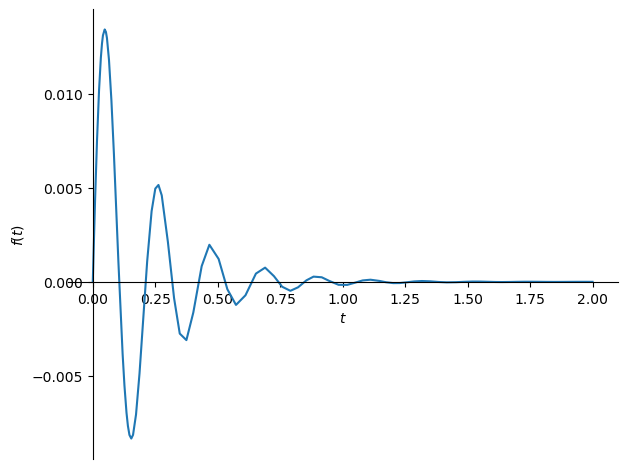

In [97]:
plt = plot(x,(t,0,2),show=False)
plt.show()


## Transformada de Fourier

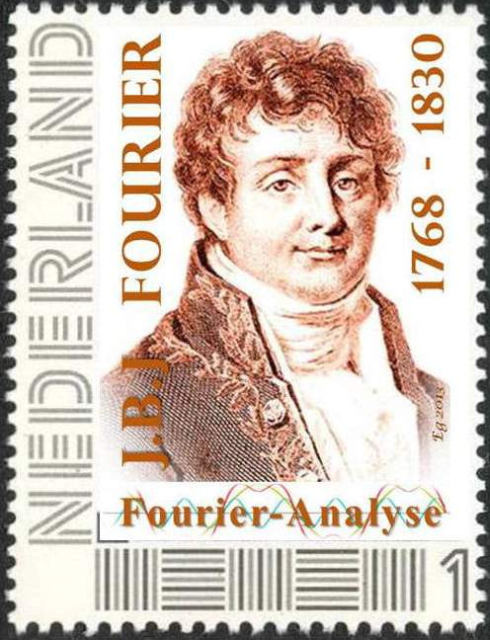

In [99]:
Image('figuras/Fourier.png',width=300)

Essa transformada está relacionada com a transformada de Laplace e é utilizada para obter informações do sistema no domínio da frequência. 

Inicialmente, a transferência de Fourier foi desenvolvida para análise de sinais aperiódicos, mas também pode ser aplicada a sinais periódicos. 

$X(\omega) = \mathscr{F}_{\omega}\{x(t)\} = \int_{-\infty}^{\infty}e^{-i \omega t}x(t)dt$

* A transformada de Fourier pode ser obtida fazendo $s = i \omega$ na transformada de Laplace.

* Embora essa substituição não consista em uma definição rigorosa, ela permite estabelecer uma conexão entre as duas transformadas. 

A transformada inversa é dada por: 

$x(t) = \mathscr{L}_{\omega}^{-1}\{ X(\omega) \} = \dfrac{1}{2 \pi} \int_{-\infty}^{\infty} e^{i \omega t} X(\omega)d\omega$

Com isso, é possível avaliar um sinal qualquer no domínio da frequência. 

No caso de sinais periódicos, o espectro é composto por impulsos localizados nas frequências presentes no sinal, portanto, um espectro discreto. 

* Tanto a amplitude quanto a frequência caracterizam o tipo de sinal. 

$\to$ Note que, pensando em termos da série de Fourier, o espectro de Fourier representaria as frequências associadas aos termos da série para representar a função. 

* A análise do espectro de um sinal pode ser entendida como uma monitoração da resposta, muito útil para o diagnóstico de situações críticas de funcionamento de determinado equipamento mecânico sujeito a vibrações.
* Existem diversas normas técnicas que definem situações críticas, indicando as condições em que o equipamento deve ser retirado de uso. 

$\to$ Uma ferramenta comumente utilizada na identificação de sistemas é a transformada de Fourier **FFT** (*Fast Fourier Transform*).

A **Função de Resposta em Frequência (FRF)** é definida como a razão da transformada de Fourier da resposta pela transformada de Fourier do forçamento: 

$G(\omega) = \dfrac{X(\omega)}{F(\omega)}$

In [105]:
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t_n = np.arange(0,1,ts)

freq = 1.
x_n = 3*np.sin(2*np.pi*freq*t_n)

freq = 4
x_n += np.sin(2*np.pi*freq*t_n)

freq = 7   
x_n += 0.5* np.sin(2*np.pi*freq*t_n)


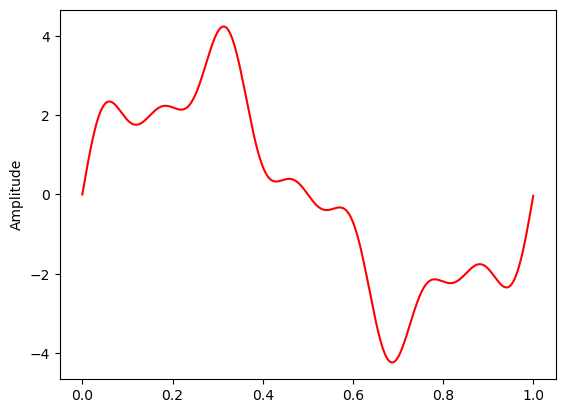

In [107]:
plt.figure()
plt.plot(t_n, x_n, 'r')
plt.ylabel('Amplitude')
plt.show()

In [108]:
from numpy.fft import fft, ifft

X = fft(x_n)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

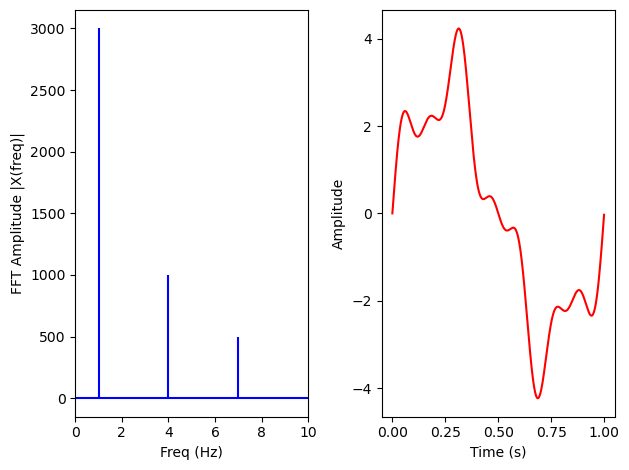

In [165]:
plt.figure()
plt.subplot(121)
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.subplot(122)
plt.plot(t_n, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

[Avançar para o próximo capítulo](Vibs5.ipynb)

[Voltar para o menu inicial](LEIAME.ipynb)